In [122]:
import numpy as np
import matplotlib.pyplot as plt

In [123]:
colors = ['salmon','dodgerblue','mediumseagreen']
colors = ['#FFA0A0','#1e90ff','#3cb371']
colors_light = ['#FFEDED','#6BDDFF','#89FFBE']

In [124]:
!head ../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_truncated.dat

#L=12, N=12, l=6, U/t=3.300000, num_replicas=1 
# betas    tau_K         tau_K_err          tau_V          tau_V_err 
2.000000 230.75000000 5.41830874 245.57500000 5.32710929
4.000000 366.30000000 8.63312358 383.65000000 8.06553654
8.000000 582.60000000 13.20563506 601.88750000 12.14001900
16.000000 1008.43750000 21.58268501 1057.28750000 26.30100947
32.000000 2123.27500000 90.83962773 2225.35000000 106.73519240


In [125]:
betas_truncated = np.loadtxt("../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_truncated.dat")[:,0]
tau_kinetic_truncated = np.loadtxt("../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_truncated.dat")[:,1]
tau_kineticErr_truncated = np.loadtxt("../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_truncated.dat")[:,2]

betas_uniform = np.loadtxt("../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_uniform.dat")[:,0]
tau_kinetic_uniform = np.loadtxt("../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_uniform.dat")[:,1]
tau_kineticErr_uniform = np.loadtxt("../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_uniform.dat")[:,2]

In [126]:
tau_potential_truncated = np.loadtxt("../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_truncated.dat")[:,3]
tau_potentialErr_truncated = np.loadtxt("../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_truncated.dat")[:,4]

tau_potential_uniform = np.loadtxt("../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_uniform.dat")[:,3]
tau_potentialErr_uniform = np.loadtxt("../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_uniform.dat")[:,4]

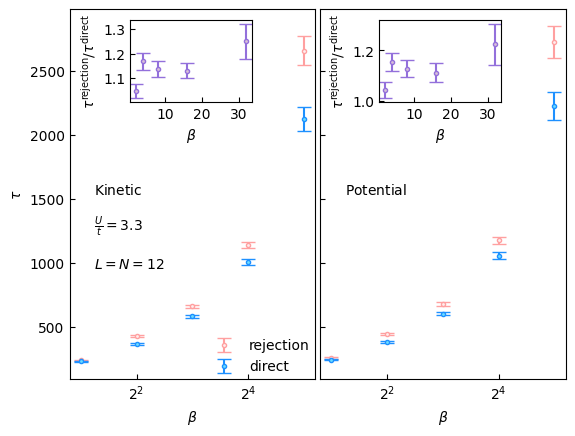

In [131]:
# with plt.style.context('../IOP_large.mpbetastyle'):

# Kinetic energies subplot
fig, ax = plt.subplots(1,2,sharey=True,sharex=True)
plt.subplots_adjust(wspace=0.02)

ax[0].set_xscale("log",base=2)
# ax[0].set_yscale("log",base=2)

# plt.yscale("log",basey=2)

ax[0].errorbar(betas_uniform,tau_kinetic_uniform,tau_kineticErr_uniform, fmt='.', 
             capsize=5,label="rejection",color=colors[0],
             mfc=colors_light[0],zorder=1)
ax[0].errorbar(betas_truncated,tau_kinetic_truncated,tau_kineticErr_truncated, fmt='.', 
             capsize=5,label="direct",color=colors[1],
             mfc=colors_light[1],zorder=1)
ax[0].tick_params(direction='in')
ax[0].set_ylabel(r"$\tau$")
ax[0].set_xlabel(r"$\beta$")
ax[0].tick_params(direction='in')
ax[0].annotate(r"$\rm{Kinetic}$",(0.10,0.50),xycoords="axes fraction",fontsize=10)
ax[0].annotate(r"$\frac{U}{t} = 3.3$",(0.10,0.40),xycoords="axes fraction")
ax[0].annotate(r"$L=N=12$",(0.10,0.30),xycoords="axes fraction")
ax[0].legend(frameon=False,loc=(0.550,0.00))


ax[1].errorbar(betas_uniform,tau_potential_uniform,tau_potentialErr_uniform, fmt='.', 
             capsize=5,label="uniform",color=colors[0],
             mfc=colors_light[0],zorder=1)
ax[1].errorbar(betas_truncated,tau_potential_truncated,tau_potentialErr_truncated, fmt='.', 
             capsize=5,label="truncated",color=colors[1],
             mfc=colors_light[1],zorder=1)
ax[1].set_xlabel(r"$\beta$")
ax[1].tick_params(direction='in')
ax[1].annotate(r"$\rm{Potential}$",(0.10,0.50),xycoords="axes fraction",fontsize=10)

# Insets kinetic energy
left,bottom,width,height = [0.220,0.687,0.19,0.19*.9]
ax2 = fig.add_axes([left,bottom,width,height])

f = np.abs(tau_kinetic_truncated/tau_potential_uniform)

f = np.abs(tau_kinetic_uniform/tau_potential_truncated)

A = tau_kinetic_uniform
σ_A = tau_kineticErr_uniform

B = tau_kinetic_truncated
σ_B = tau_kineticErr_truncated

σ_f = np.abs(f)*np.sqrt((σ_A/A)**2 + (σ_B/B)**2)

ax2.errorbar(betas_uniform,A/B,σ_f, fmt='.', 
             capsize=5,label="uniform",color="mediumpurple",
             mfc="thistle",zorder=1)

ax2.tick_params(direction='in')
ax2.set_ylabel(r"$\tau^{\rm{rejection}}/\tau^{\rm{direct}}$")
ax2.set_xlabel(r"$\beta$")

# Inset potential energy
left,bottom,width,height = [0.609,0.687,0.19,0.19*.9]
ax3 = fig.add_axes([left,bottom,width,height])

f = np.abs(tau_potential_truncated/tau_potential_uniform)

f = np.abs(tau_potential_uniform/tau_potential_truncated)

A = tau_potential_uniform
σ_A = tau_potentialErr_uniform

B = tau_potential_truncated
σ_B = tau_potentialErr_truncated

σ_f = np.abs(f)*np.sqrt((σ_A/A)**2 + (σ_B/B)**2)

ax3.errorbar(betas_uniform,A/B,σ_f, fmt='.', 
             capsize=5,label="uniform",color="mediumpurple",
             mfc="thistle",zorder=1)

ax3.tick_params(direction='in')
ax3.set_ylabel(r"$\tau^{\rm{rejection}}/\tau^{\rm{direct}}$")
ax3.set_xlabel(r"$\beta$")

plt.savefig("/home/ecasiano/Desktop/papers-code-truncExponSampling/figures/pigsfli_tau_vs_beta_critical.pdf",dpi=300)

In [128]:
582.6/662.625

0.8792303338992643

[0.95712755 0.86478262 0.88635067 0.8987292  0.81696074]


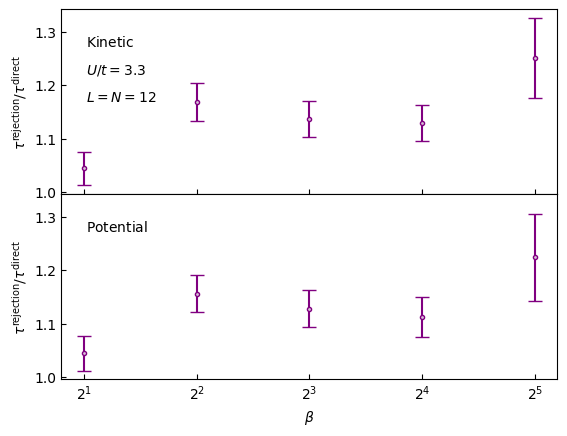

In [129]:
# with plt.style.context('../IOP_large.mpbetastyle'):
color = 'purple'
color_light = 'thistle'

# Kinetic energies subplot
fig, ax = plt.subplots(2,1,sharey=True,sharex=True)
plt.subplots_adjust(hspace=0.001)
# fig, ax = plt.subplots()

ax[0].set_xscale('log', base=2)
# plt.yscale("log",basey=2)

f = np.abs(tau_kinetic_uniform/tau_kinetic_truncated)

A = tau_kinetic_uniform
σ_A = tau_kineticErr_uniform

B = tau_kinetic_truncated
σ_B = tau_kineticErr_truncated

σ_f = np.abs(f)*np.sqrt((σ_A/A)**2 + (σ_B/B)**2)

ax[0].errorbar(betas_uniform,A/B,σ_f, fmt='.', 
             capsize=5,label="uniform",color=color,
             mfc=color_light,zorder=1)
# ax[0].errorbar(betas_truncated,tau_kinetic_truncated,tau_kineticErr_truncated, fmt='.', 
#              capsize=5,label="direct",color=colors[1],
#              mfc=colors_light[1],zorder=1)
ax[0].annotate(r"$U/t = 3.3$",(0.05,0.65),xycoords="axes fraction")
ax[0].annotate(r"$L = N = 12$",(0.05,0.50),xycoords="axes fraction")
ax[0].tick_params(direction='in')
ax[0].set_ylabel(r"$\tau^{\rm{rejection}}/\tau^{\rm{direct}}$")
ax[0].set_xlabel("")
ax[0].tick_params(direction='in')
ax[0].annotate(r"$\rm{Kinetic}$",(0.05,0.8),xycoords="axes fraction")

ax[1].set_xscale('log', base=2)

f = np.abs(tau_potential_truncated/tau_potential_uniform)
print(f)

f = np.abs(tau_potential_uniform/tau_potential_truncated)

A = tau_potential_uniform
σ_A = tau_potentialErr_uniform

B = tau_potential_truncated
σ_B = tau_potentialErr_truncated

σ_f = np.abs(f)*np.sqrt((σ_A/A)**2 + (σ_B/B)**2)

ax[1].errorbar(betas_uniform,A/B,σ_f, fmt='.', 
             capsize=5,label="uniform",color=color,
             mfc=color_light,zorder=1)

ax[1].set_ylabel(r"$\tau^{\rm{rejection}}/\tau^{\rm{direct}}$")
ax[1].set_xlabel(r"$\beta$")
ax[1].tick_params(direction='in')
ax[1].annotate(r"$\rm{Potential}$",(0.05,0.8),xycoords="axes fraction")


plt.savefig("/home/ecasiano/Desktop/papers-code-truncExponSampling/figures/pigsfli_tau_vs_beta_critical_ratios.pdf",dpi=300)